<center>Experiment 1</center>

In [1]:
# xor gate implimentation using ANN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2024-02-13 10:52:45.412480: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-13 10:52:45.479337: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 10:52:45.622535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 10:52:45.622582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 10:52:45.632925: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# input data
x = np.array([[0,0],[0,1],[1,0],[1,1]])
# output data
y = np.array([[0],[1],[1],[0]])

In [3]:
# model
model = keras.Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
# compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

In [5]:
# fit model
history = model.fit(x, y, epochs=1000, batch_size=4)

Epoch 1/1000
1/1 [==============================] - 0s 406ms/step - loss: 0.2621 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2618 - binary_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2616 - binary_accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2613 - binary_accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2611 - binary_accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2608 - binary_accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2606 - binary_accuracy: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2603 - binary_accuracy: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2601 - binary_accuracy: 0.2500
Epoch 10/1000
1/1 [==============================] - 

In [6]:
# evaluate model
loss, accuracy = model.evaluate(x, y)

1/1 [==============================] - 0s 115ms/step - loss: 0.0323 - binary_accuracy: 1.0000


In [7]:
# predict
predictions = model.predict(x)
print(predictions)

1/1 [==============================] - 0s 48ms/step
[[0.19503291]
 [0.9381092 ]
 [0.71699816]
 [0.08434912]]


Text(0.5, 1.0, 'model loss')

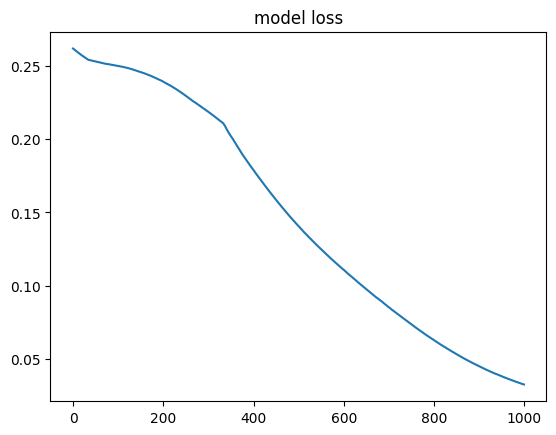

In [8]:
# plot loss
plt.plot(history.history['loss'])
plt.title('model loss')

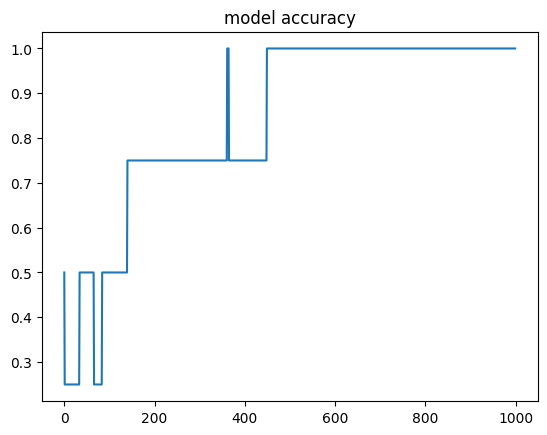

In [9]:
# plot accuracy
plt.plot(history.history['binary_accuracy'])
plt.title('model accuracy')
plt.show()

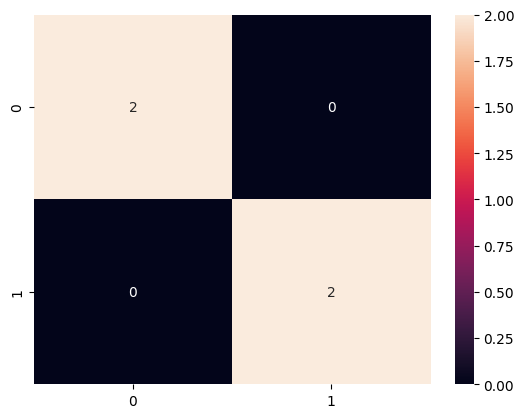

In [10]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predictions > 0.5)
sns.heatmap(cm, annot=True)
plt.show()

2813/2813 [==============================] - 2s 540us/step


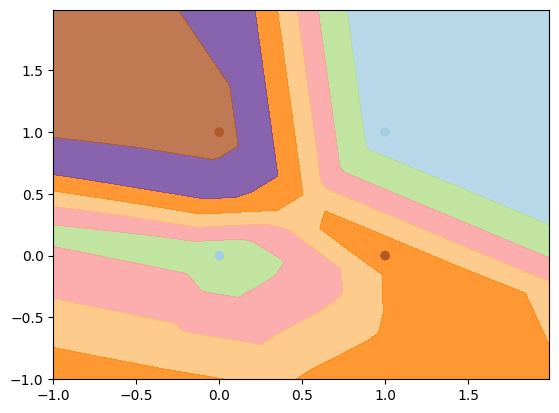

In [11]:
# plot decision boundary
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()